In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

datadir = '/Users/schwarz/Documents/projects/element/research/rto_nime22/user_data/'
p1fam = 'P1/2022-07-28T15-09-33.830Z.txt'
p1exp = 'P1/2022-07-28T15-10-29.580Z.txt'
p2fam = 'P2/2022-08-30T16-37-21.326Z.txt'
p2exp = 'P2/2022-08-30T16-38-30.262Z.txt'
p3fam = 'P3/2022-09-01T17-04-31.275Z.txt'
p3exp = 'P3/2022-09-01T17-07-04.283Z.txt'
p4fam = 'P4/2022-09-02T12-19-35.310Z.txt'
p4exp = 'P4/2022-09-02T12-21-02.022Z.txt'

<AxesSubplot:>

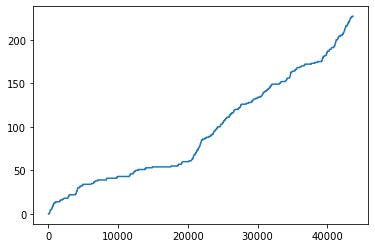

In [15]:
# old load method
logfilename = datadir + p2exp
df = pd.read_json(logfilename, lines=True)

# split into 3 dataframes by type of line 
datind = df['logtype'] == 'data'
segind = df['logtype'] == 'segment'
evtind = df['logtype'] == 'event'
fbind  = df['logtype'] == 'feedback'

data   = df[datind].dropna(axis=1)
seg    = df[segind].dropna(axis=1)
evt    = df[evtind].dropna(axis=1)
fb     = df[fbind].dropna(axis=1)

(seg['min_dtw_pond'] > 1).cumsum().plot()

In [17]:
# new load method
res0, seg0 = read_log(datadir + p4fam)
res,  seg  = read_log(datadir + p4exp)
seg0 = pd.DataFrame(seg0)
seg  = pd.DataFrame(seg)
seg

0 {'logtype': 'event', 'timestamp0': 24320, 'event': ['Familiarization']}
0 {'logtype': 'event', 'timestamp0': 110998, 'event': ['Start Condition 1']}
22730 {'logtype': 'event', 'timestamp0': 470996, 'event': ['timer zero']}
22731 {'logtype': 'event', 'timestamp0': 496365, 'event': ['Start Condition 2']}
45956 {'logtype': 'event', 'timestamp0': 856365, 'event': ['timer zero']}


,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,model_length,worker_1,avg_dtw,dtw,logtype,random_novelty,condition
0,2308.815278,54,0,1996.632900,0,0.000000,0.000000,0,1996.759374,0.000000,False,segment,0.715,c1
1,2440.416376,13,1,2127.532365,1,35.125869,1.048533,1,2128.234929,0.524267,2,segment,0.901,c1
2,2547.651767,11,2,2234.829648,1,1.621856,0.135155,2,2235.324929,0.394563,0.342543,segment,0.653,c1
3,2714.715380,17,3,2401.887448,3,9.648650,0.643243,2,2403.529340,0.456733,1.40836,segment,0.529,c1
4,3049.278237,33,4,2736.508149,4,39.212408,1.568496,3,2738.628157,0.679086,2.30972,segment,0.777,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,743447.805114,12,1599,743689.566201,68,2.708891,0.164175,1003,743766.006908,0.468709,0.350271,segment,-99.000,c2
1563,743945.565741,49,1600,743766.152826,1600,38.375482,0.834250,1003,744070.580493,0.468943,1.779,segment,-99.000,c2
1564,744293.779463,35,1601,744070.723087,1601,18.397823,0.549189,1004,744288.745655,0.468994,1.17099,segment,-99.000,c2
1565,744461.217703,17,1602,744288.866815,1602,5.523042,0.394503,1005,744394.110636,0.468947,0.841254,segment,-99.000,c2


<AxesSubplot:>

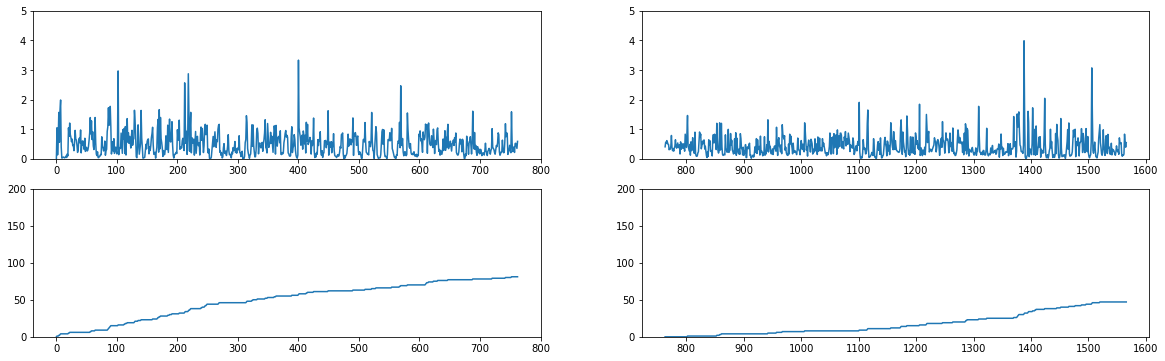

In [18]:
nov0 = select(seg0, condition='c0')
nov1 = select(seg, condition='c1')
nov2 = select(seg, condition='c2')

#ymax = max((nov1['min_dtw_pond'] > 1).cumsum(), (nov2['min_dtw_pond'] > 1).cumsum())
ymax = 200

plt.figure(figsize=(20, 6)) 
plt.subplot(2, 2, 1)
nov1['min_dtw_pond'].plot(ylim=(0, 5))
plt.subplot(2, 2, 2)
nov2['min_dtw_pond'].plot(ylim=(0, 5))
plt.subplot(2, 2, 3)
(nov1['min_dtw_pond'] > 1).cumsum().plot(ylim=(0, ymax))
plt.subplot(2, 2, 4)
(nov2['min_dtw_pond'] > 1).cumsum().plot(ylim=(0, ymax))

(array([ 52.,  85., 126., 130., 112., 115.,  82.,  62.,  62.,  43.,  29.,
         19.,  23.,  21.,  14.,   7.,  12.,   7.,   3.,   5.,   3.,   4.,
          2.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

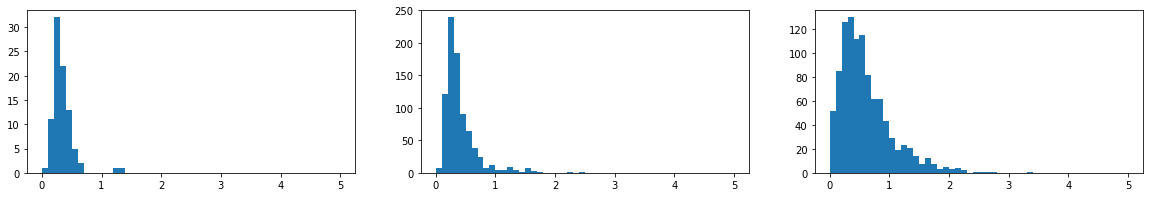

In [9]:
plt.figure(figsize=(20, 3)) 
plt.subplot(1, 3, 1)
plt.hist(nov0['min_dtw_pond'], 50, range=(0, 5))
plt.subplot(1, 3, 2)
plt.hist(nov1['min_dtw_pond'], 50, range=(0, 5))
plt.subplot(1, 3, 3)
plt.hist(nov2['min_dtw_pond'], 50, range=(0, 5))